In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../lib')
from temporal_encoder_common import *
import dlop_ldn_function_bases as bases

In [37]:
q = 3
A, B = bases.mk_ldn_lti(q)
T, dt = 2.0, 1e-3
ts_flt = np.arange(0, T, dt)
M = cached_lti_impulse_response(A, B, ts_flt, dt)

In [36]:
W = solve_for_linear_dynamics(
    [Filters.lowpass(100e-3), Filters.lowpass(100e-3), Filters.lowpass(100e-3), Filters.lowpass(100e-3)],
    [Filters.dirac(), Filters.lti(A, B, 0), Filters.lti(A, B, 1), Filters.lti(A, B, 2)],
    [Filters.lti(A, B, 0), Filters.lti(A, B, 1), Filters.lti(A, B, 2)],
)

100%|██████████| 1000/1000 [00:03<00:00, 324.03it/s]


In [43]:
Ap = W[1:4].reshape(1, 3, 3)
Bp = W[0].reshape(1, 3)
ts, xs, ys = simulate_dynamics([(100e-3,)], [(100e-3,)], Ap, Bp)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [44]:
(Ap - np.eye(3)) / 0.1, A

(array([[[-0.99650932,  2.98351006, -4.9974667 ],
         [-0.99450335, -2.98052604,  4.99247671],
         [-0.99949334, -2.99548603, -4.98250671]]]),
 array([[-1., -1., -1.],
        [ 3., -3., -3.],
        [-5.,  5., -5.]]))

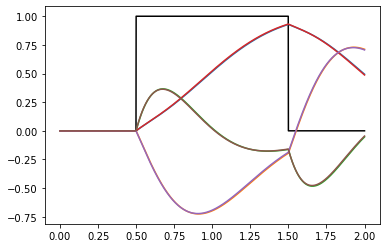

In [45]:
fig, ax = plt.subplots()
ax.plot(ts, xs, 'k-')
ax.plot(ts, ys)
for i in range(q):
    ax.plot(ts, np.convolve(xs[:, 0], M[:, i], 'full')[:len(ts)] * dt)